## **1. LINEAR REGRESSION IMPLEMENTATION**

#### Overview:
- In this notebook, we have covered Multiple Linear Regression
- Along with that, we have covered Ridge Regression
- Lasso Regression
- Elastic Net Regression
- For Errors we have used cost functions like MSE, MAE, RMSE
- R-squared and Adjusted R-squared accuracy metrics

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from flask import Flask

In [1]:
from sklearn.datasets import fetch_california_housing

In [5]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

##### DESCRIPTION ABOUT THE DATASET

In [7]:
type(dataset)

sklearn.utils._bunch.Bunch

In [12]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [13]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [14]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
california_dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


##### Converted Sklearn.Bunch type to Pandas.DataFrame type

#### What to do?
- Bifurcate the dataset into independent and dependent variables.
- Divide into training and testing sets.
- Perform the EDA and Feature engineering

In [19]:
# checking for null values
california_dataset.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

NO NULL VALUES FOUND

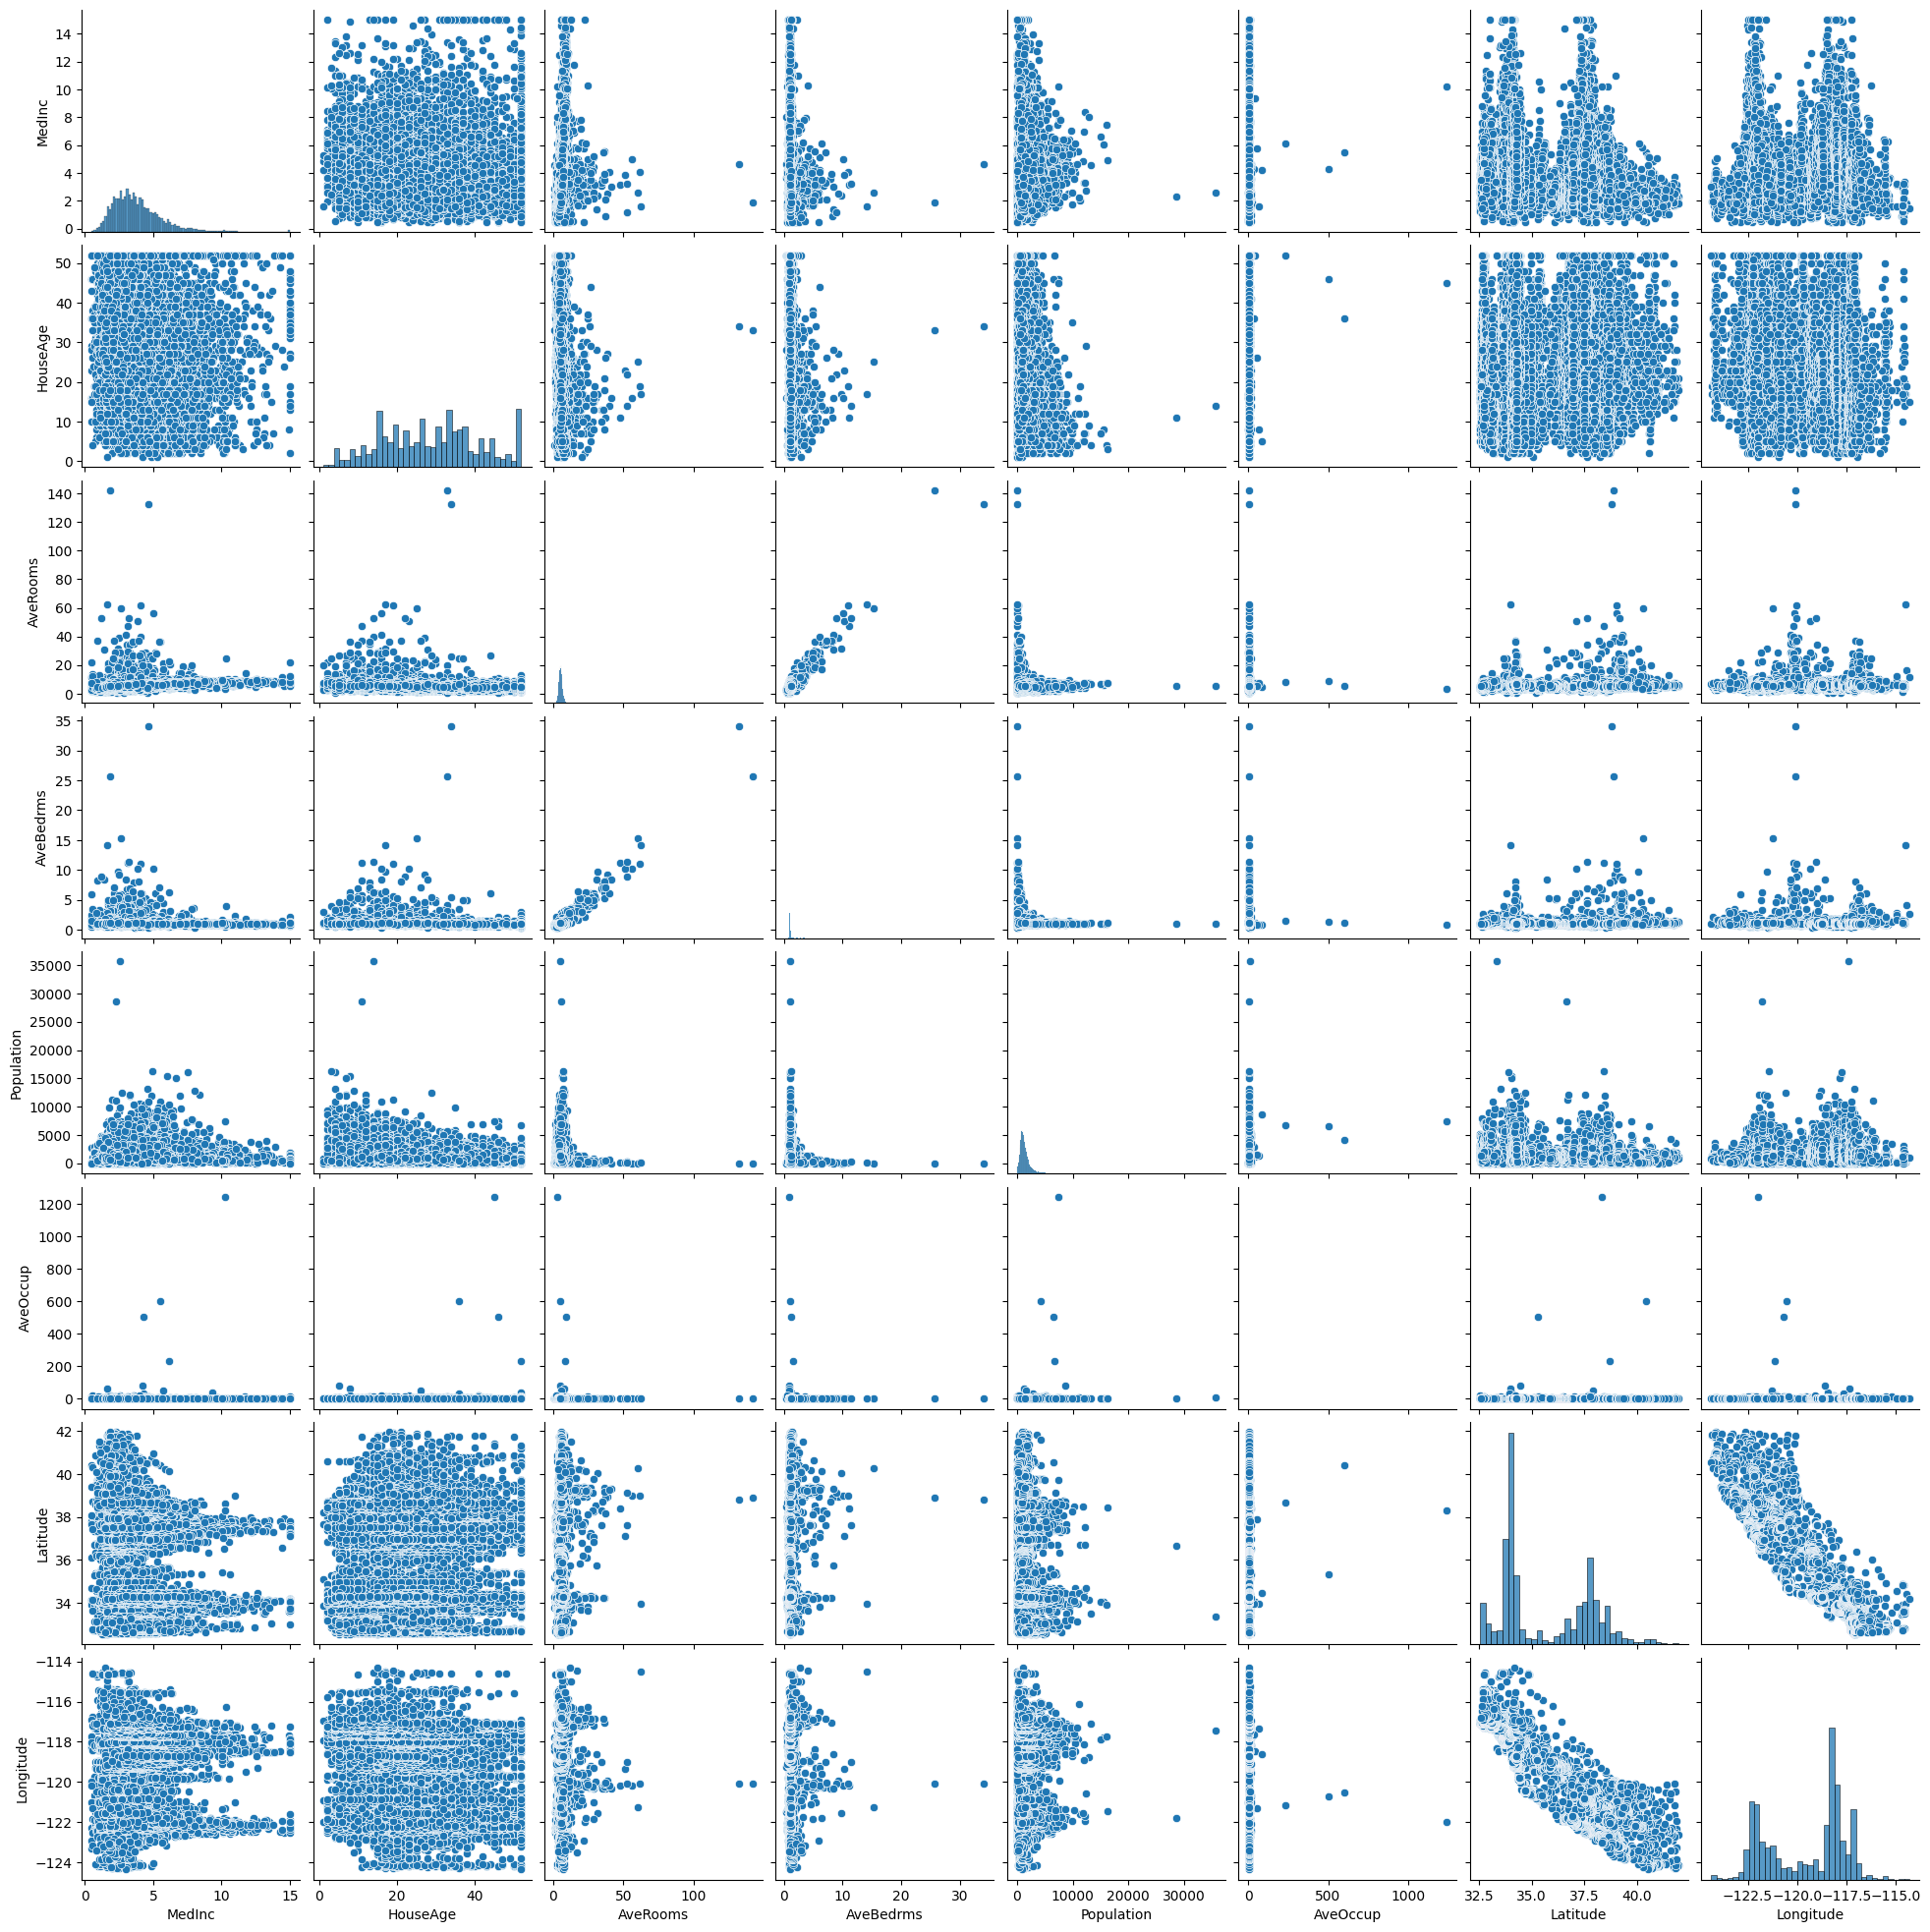

In [22]:
sns.pairplot(california_dataset)

##### WE HAVE PLOTTED EACH AND EVERY FEATURE IN OUR DATASET

In [23]:
california_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
# as we converted bunch type to dataframe we can see that we do not have our target feature, let's try to fetch and append that
target_Series = pd.Series(dataset.target)
california_dataset["MedHouseVal"] = target_Series

In [39]:
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
# dividing into independent and dependent features
X = california_dataset.iloc[:,:-1]
Y = california_dataset.iloc[:,-1]

In [42]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=36)

In [60]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [61]:
X.shape

(20640, 8)

##### we can see 70% is training set and 30% is test set

## **2. FEATURE SCALING : STANDARDIZATION**

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # creating a scaler object

# converting data into mean = 0 and standard deviation = 1
# finding z-score across dataset

In [63]:
scaler.fit_transform(X_train)

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

#### Inferences:
- fit_transform is performed only to training data
- we directly perform .transform on test data
- after execution the above values per feature have mean = 0 and standard deviation = 1

## **3. IMPLEMENTING MULTIPLE LINEAR REGRESSION**

In [64]:
# implementing liinear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # creating an object of Linear Regression model

regressor.fit(X_train,Y_train)
# here we don't need to change the values of params of training set that's why only fit and not fit_transform

LinearRegression()

we can say the model is trained, but can we see the coefficients ?

In [67]:
regressor.coef_

array([ 4.35918466e-01,  9.75471838e-03, -1.02880280e-01,  6.22628670e-01,
       -7.05905485e-06, -3.95342600e-03, -4.22897230e-01, -4.35685620e-01])

Here are the slopes, we can see that number of slopes = number of independent variables

In [68]:
regressor.intercept_

-37.02561385227201

In [69]:
# predicting for test set
Y_pred = regressor.predict(X_test)

In [70]:
Y_pred

array([1.74054339, 0.90455512, 2.45240228, ..., 5.22766823, 4.15452378,
       1.73613111])

## **4. ANALYSING ERROR**

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  0.5335029155157129


In [75]:
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  0.5408989481794167


In [76]:
print("Root Mean Sqaured Error: ",np.sqrt(mse))

Root Mean Sqaured Error:  0.7304128390956124


#### To check accuracy:
- R^2 Error
- Adjusted R^2 Error

In [77]:
from sklearn.metrics import r2_score

In [80]:
r_sq = r2_score(Y_test, Y_pred)
print(f"R-Squared Accuracy: {r_sq*100} %")

R-Squared Accuracy: 58.753943434992216 %


Compared to other models 58.75% accuracy is low.
But just by creating a straight line, we are able to squeeze out 59% accuracy, this is good.

In [84]:
# for adjusted r-squared error we have to use core python
adj_r2_sq = 1 - (1-r_sq)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f"Adjusted R_Squared Accuracy: {adj_r2_sq*100} %")

Adjusted R_Squared Accuracy: 58.73794961731396 %


## **5. IMPLEMENTING RIDGE REGRESSION**

In [88]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()

In [89]:
ridge_regressor.fit(X_train, Y_train)

Ridge()

In [90]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [110]:
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
print("Mean Squared Error: ",mse_ridge)

mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
print("Mean Absolute Error: ",mae_ridge)

print("Root Mean Sqaured Error: ",np.sqrt(mse_ridge))

Mean Squared Error:  0.5335090521919612
Mean Absolute Error:  0.5409118912467871
Root Mean Sqaured Error:  0.7304170399107357


In [111]:
r_sq_ridge = r2_score(Y_test, y_pred_ridge)
print(f"R-Squared Accuracy: {r_sq_ridge*100} %")

# for adjusted r-squared error we have to use core python
adj_r2_sq_ridge = 1 - (1-r_sq)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f"Adjusted R_Squared Accuracy: {adj_r2_sq_ridge*100} %")

R-Squared Accuracy: 58.753468997668094 %
Adjusted R_Squared Accuracy: 58.73747499601918 %


#### Inferences:
- There isn't much difference in accuracy when compared to linear regression.
- The reason for that is that we haven't played around with the parameter alpha which takes 1.0 as default value.

## **6. IMPLEMENTING LASSO REGRESSION**

In [102]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()

In [103]:
lasso_regressor.fit(X_train, Y_train)

Lasso()

In [105]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.94025077, 1.84564213, 2.10310927, ..., 3.20301223, 2.84442016,
       2.00470561])

In [112]:
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
print("Mean Squared Error: ",mse_lasso)

mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
print("Mean Absolute Error: ",mae_lasso)

print("Root Mean Sqaured Error: ",np.sqrt(mse_lasso))

Mean Squared Error:  0.9202644409785837
Mean Absolute Error:  0.7560883324381847
Root Mean Sqaured Error:  0.9593041441475085


In [113]:
r_sq_lasso = r2_score(Y_test, y_pred_lasso)
print(f"R-Squared Accuracy: {r_sq_lasso*100} %")

# for adjusted r-squared error we have to use core python
adj_r2_sq_lasso = 1 - (1-r_sq_lasso)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f"Adjusted R_Squared Accuracy: {adj_r2_sq_lasso*100} %")

R-Squared Accuracy: 28.852723980568395 %
Adjusted R_Squared Accuracy: 28.82513548712865 %


## **7. IMPLEMENTING ELASTIC NET REGRESSION**

In [107]:
from sklearn.linear_model import ElasticNet
elastic_regressor = ElasticNet()

In [108]:
elastic_regressor.fit(X_train, Y_train)

ElasticNet()

In [109]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred_elastic

array([1.8346624 , 1.70130564, 2.13027193, ..., 4.0114711 , 3.35898112,
       1.95563793])

In [114]:
mse_elastic = mean_squared_error(Y_test, y_pred_elastic)
print("Mean Squared Error: ",mse_elastic)

mae_elastic = mean_absolute_error(Y_test, y_pred_elastic)
print("Mean Absolute Error: ",mae_lasso)

print("Root Mean Sqaured Error: ",np.sqrt(mse_elastic))

Mean Squared Error:  0.7585595007199187
Mean Absolute Error:  0.7560883324381847
Root Mean Sqaured Error:  0.8709532138524542


In [115]:
r_sq_elastic = r2_score(Y_test, y_pred_elastic)
print(f"R-Squared Accuracy: {r_sq_elastic*100} %")

# for adjusted r-squared error we have to use core python
adj_r2_sq_elastic = 1 - (1-r_sq_elastic)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f"Adjusted R_Squared Accuracy: {adj_r2_sq_elastic*100} %")

R-Squared Accuracy: 41.354419695394654 %
Adjusted R_Squared Accuracy: 41.33167893428579 %
